In [98]:
from nlb_tools.nwb_interface import NWBDataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', size=18)

In [99]:
# foldername = "/Volumes/TOSHIBA EXT/sherry/area2/raeed/"
# import h5py 
monkey = "Han_20171207"
monkey_abbr = 'H'

# f = h5py.File(foldername+ monkey + '_COactpas_TD.mat','r')
# unit_guide = np.array(f['trial_data']['S1_unit_guide'][0])
# np.savez(monkey+'_unit_guide', unit_guide = unit_guide) 
with np.load(monkey+'_unit_guide.npz') as data:
    unit_guide = data['unit_guide']
print(unit_guide)
print(unit_guide.shape)

[ 1  1  2  3  3  3  3  3  3  3  4  4  5  6  6  7  7  8  8  9  9 10 10 11
 11 12 13 13 14 15 16 17 18 18 19 19 19 20 20 20 20 21 22 22 23 23 24 25
 25 26 26 27 27 29 30 31 32 33 34 34 35 36 36 36 36 36 37 38 38 39 39 40
 40 41 41 42 44 44 45 47 47 47 48 48 49 50 51 51 52 52 53 53 55 55 56 56
 57 57 58 59 59 60 61 61 62 62 63 64 64 65 66 66 66 67 67 68 68 68 69 69
 69 70 70 71 72 72 72 74 74 76 76 78 78 79 84 84 85 85 86 88 88 89 89 90
 90 91 91 92 93 94 94 95 95 96 96]
(155,)


In [100]:
foldername = "/Volumes/TOSHIBA EXT/sherry/area2/s1-kinematics/sensory_mapping/"
import pandas as pd
elec_map = pd.read_csv(foldername+'elec_map.csv')
elec_map = elec_map[elec_map['monkey']==monkey_abbr]

rf_map = pd.read_csv(foldername+'rf_map.csv')
rf_map = rf_map[rf_map['monkey']==monkey_abbr]

# print(elec_map)
# print(rf_map)

rf_cutaneous = rf_map[rf_map['modality']=='cutaneous']['label']
rf_deep = rf_map[rf_map['modality']=='deep']['label']
deep_channels = elec_map['chan'][elec_map['label'].isin(rf_deep)].to_numpy()
cutaneous_channels = elec_map['chan'][elec_map['label'].isin(rf_cutaneous)].to_numpy()
print(deep_channels.shape)
print(deep_channels)
print(cutaneous_channels.shape)
print(cutaneous_channels)
deep_neurons = []
cutaneous_neurons = []
for i in range(len(unit_guide)):
    if unit_guide[i] in deep_channels:
        deep_neurons.append(i)
    if unit_guide[i] in cutaneous_channels:
        cutaneous_neurons.append(i)
print(len(deep_neurons))
print(deep_neurons)
print(len(cutaneous_neurons))
print(cutaneous_neurons)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/TOSHIBA EXT/sherry/area2/s1-kinematics/sensory_mapping/elec_map.csv'

In [ ]:
distal_parts = ['hand','wrist','forearm']
proximal_parts = ['elbow','humerus','shoulder','torso','arm']

rf_distal = rf_map[rf_map['receptive_field'].isin(distal_parts)]['label']
rf_proximal = rf_map[rf_map['receptive_field'].isin(proximal_parts)]['label']
distal_channels = elec_map['chan'][elec_map['label'].isin(rf_distal)].to_numpy()
proximal_channels = elec_map['chan'][elec_map['label'].isin(rf_proximal)].to_numpy()
print(distal_channels.shape)
print(distal_channels)
print(proximal_channels.shape)
print(proximal_channels)
distal_neurons = []
proximal_neurons = []
for i in range(len(unit_guide)):
    if unit_guide[i] in distal_channels:
        distal_neurons.append(i)
    if unit_guide[i] in proximal_channels:
        proximal_neurons.append(i)
print(len(distal_neurons))
print(distal_neurons)
print(len(proximal_neurons))
print(proximal_neurons)

(26,)
[ 1  2  3 24 26 27 29 33 44 50 51 58 61 62 66 67 69 70 71 72 73 83 84 86
 87 89]
(30,)
[ 4 16 19 20 21 22 25 28 30 31 34 35 36 49 52 53 56 57 58 62 65 68 70 72
 81 82 84 87 88 89]
14
[15, 18, 19, 20, 21, 22, 33, 34, 43, 44, 45, 46, 51, 52]
28
[0, 9, 12, 13, 14, 16, 17, 23, 24, 25, 26, 27, 31, 32, 35, 36, 37, 38, 39, 40, 43, 44, 49, 50, 51, 52, 53, 54]


In [190]:
monkey = 'Duncan_20190710'
foldername = "~/area2_population_analysis/s1-kinematics/actpas_NWB/"
filename = foldername + monkey + "_COactpas_reformat.nwb"
# filename = foldername + monkey + '_COactpas_TD.nwb'
dataset = NWBDataset(filename, split_heldout=False)

In [178]:
dataset.bin_width

1

In [191]:
from Area2_analysis.lr_funcs import nans
#make dictionary for trial condition (reaching directions) for Stratified CV
active_mask = (dataset.trial_info.ctr_hold_bump==0) & (dataset.trial_info.split != 'none')
passive_mask = (dataset.trial_info.ctr_hold_bump==1) & (dataset.trial_info.split != 'none')
nan_mask = (np.isnan(dataset.trial_info.ctr_hold_bump)) & (dataset.trial_info.split != 'none')

trial_mask = active_mask
active_trials_idx = np.array(dataset.trial_info.loc[trial_mask]['trial_id'])
active_n_trials = dataset.trial_info.loc[trial_mask].shape[0]
print(active_n_trials,'active trials')

trial_mask = passive_mask
passive_trials_idx = np.array(dataset.trial_info.loc[trial_mask]['trial_id'])
passive_n_trials = dataset.trial_info.loc[trial_mask].shape[0]
print(passive_n_trials,'passive trials')

trial_mask = nan_mask
nan_trials_idx = np.array(dataset.trial_info.loc[trial_mask]['trial_id'])
nan_n_trials = dataset.trial_info.loc[trial_mask].shape[0]
print(nan_n_trials,'reach-bump trials')


active_cond_dir_idx = []
passive_cond_dir_idx = []
nan_cond_dir_idx = []
for direction in [0,45,90,135,180,225,270,315]:
# for direction in [0,90,180,270]:
    active_cond_dir_idx.append(np.where((dataset.trial_info['cond_dir'] == direction) & (dataset.trial_info['ctr_hold_bump'] == 0) & \
           (dataset.trial_info['split'] != 'none'))[0])
    passive_cond_dir_idx.append(np.where((dataset.trial_info['cond_dir']%360 == direction) & (dataset.trial_info['ctr_hold_bump'] == 1) & \
           (dataset.trial_info['split'] != 'none'))[0])
    nan_cond_dir_idx.append(np.where((dataset.trial_info['cond_dir']%360 == direction) & (np.isnan(dataset.trial_info['ctr_hold_bump'])) & \
           (dataset.trial_info['split'] != 'none'))[0])
    
active_cond_dict = nans([active_n_trials])
i = 0
for idx in active_trials_idx:
    for cond in range(0,len(active_cond_dir_idx)):
        if idx in active_cond_dir_idx[cond]:
            active_cond_dict[i] = cond
            break
    i+=1
print(active_cond_dict)
print(len(active_cond_dict))

passive_cond_dict = nans([passive_n_trials])
i = 0
for idx in passive_trials_idx:
    for cond in range(0,len(passive_cond_dir_idx)):
        if idx in passive_cond_dir_idx[cond]:
            passive_cond_dict[i] = cond
            break
    i+=1
print(passive_cond_dict)
print(len(passive_cond_dict))

nan_cond_dict = nans([nan_n_trials])
i = 0
for idx in nan_trials_idx:
    for cond in range(0,len(nan_cond_dir_idx)):
        if idx in nan_cond_dir_idx[cond]:
            nan_cond_dict[i] = cond
            break
    i+=1
print(nan_cond_dict)
print(len(nan_cond_dict))

624 active trials
308 passive trials
280 reach-bump trials
[4. 6. 1. 7. 1. 4. 5. 2. 4. 7. 4. 0. 1. 3. 0. 7. 6. 6. 1. 1. 0. 2. 5. 4.
 1. 1. 6. 6. 0. 3. 2. 2. 6. 6. 5. 3. 1. 5. 0. 0. 0. 3. 3. 1. 2. 6. 2. 5.
 6. 7. 1. 6. 1. 4. 0. 1. 1. 1. 7. 0. 4. 2. 4. 0. 0. 3. 3. 2. 4. 3. 6. 0.
 4. 2. 6. 1. 1. 1. 0. 6. 1. 0. 1. 4. 2. 5. 5. 7. 2. 6. 5. 0. 7. 7. 7. 0.
 7. 4. 2. 7. 7. 1. 7. 7. 0. 1. 5. 1. 2. 0. 4. 1. 4. 1. 2. 0. 1. 4. 1. 6.
 1. 0. 4. 3. 4. 5. 4. 4. 2. 7. 2. 0. 2. 6. 5. 2. 3. 5. 3. 3. 6. 0. 0. 7.
 4. 5. 7. 0. 4. 5. 0. 6. 4. 5. 7. 1. 4. 7. 2. 6. 7. 3. 0. 6. 4. 1. 1. 7.
 6. 5. 3. 3. 4. 5. 7. 2. 3. 6. 2. 5. 1. 3. 3. 4. 1. 7. 6. 6. 4. 0. 3. 7.
 4. 6. 5. 7. 5. 3. 1. 7. 6. 6. 2. 0. 1. 4. 4. 1. 7. 6. 3. 1. 3. 1. 6. 1.
 5. 5. 6. 4. 0. 6. 2. 0. 1. 7. 0. 5. 7. 0. 5. 4. 0. 7. 7. 4. 6. 7. 2. 0.
 0. 2. 0. 0. 0. 2. 7. 7. 7. 6. 2. 2. 7. 3. 4. 5. 6. 7. 3. 0. 4. 7. 2. 7.
 2. 7. 1. 2. 2. 2. 1. 2. 6. 6. 7. 3. 5. 7. 6. 1. 1. 0. 6. 6. 0. 4. 0. 1.
 2. 0. 7. 3. 1. 1. 4. 0. 5. 2. 3. 1. 2. 7. 0. 2. 0. 1. 1. 0. 2. 4

In [194]:
dataset.resample(10)
dataset.bin_width


10

176 neurons


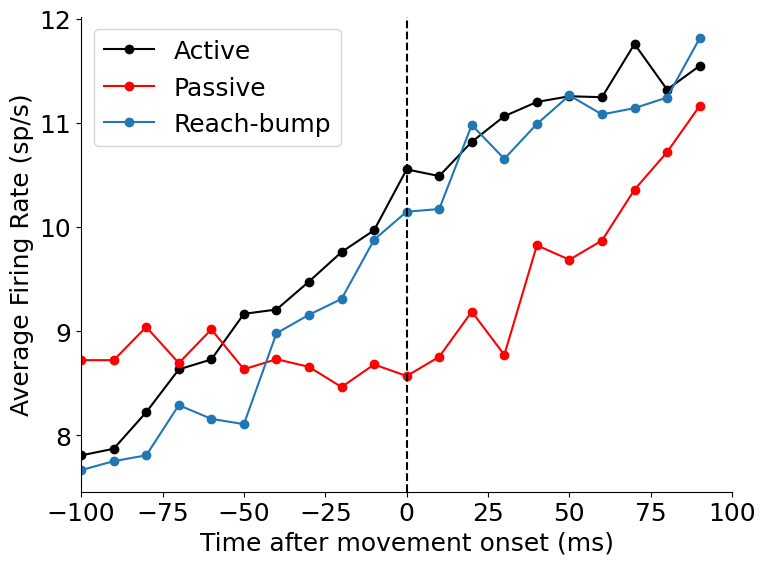

In [197]:
n_neurons = dataset.data.spikes.shape[1]
print(n_neurons,'neurons')

plot_range = (-100, 100)
x_axis = np.arange(plot_range[0], plot_range[1], dataset.bin_width)
passive_df = dataset.make_trial_data(align_field='move_onset_time', align_range=plot_range, ignored_trials=~passive_mask)
active_df = dataset.make_trial_data(align_field='move_onset_time', align_range=plot_range, ignored_trials=~active_mask)
nan_df = dataset.make_trial_data(align_field='move_onset_time', align_range=plot_range, ignored_trials=~nan_mask)

active_trials_spikes = []
for _, trial in active_df.groupby('trial_id'):
    active_trials_spikes.append(np.sum(trial.spikes,axis=1))
passive_trials_spikes = []
for _, trial in passive_df.groupby('trial_id'):
    passive_trials_spikes.append(np.sum(trial.spikes,axis=1))
nan_trials_spikes = []
for _, trial in nan_df.groupby('trial_id'):
    nan_trials_spikes.append(np.sum(trial.spikes,axis=1))

fig, ax = plt.subplots(figsize=(8,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(x_axis,np.sum(active_trials_spikes,axis = 0)/dataset.bin_width*1000/len(active_trials_spikes)/n_neurons,"-o",color = 'k',label = 'Active')
plt.plot(x_axis,np.sum(passive_trials_spikes,axis = 0)/dataset.bin_width*1000/len(passive_trials_spikes)/n_neurons,"-o",color = 'red',label = 'Passive')
plt.plot(x_axis,np.sum(nan_trials_spikes,axis = 0)/dataset.bin_width*1000/len(nan_trials_spikes)/n_neurons,"-o",label = 'Reach-bump')


plt.legend()

# plt.title('Peristimulus aligned to move_onset')
plt.ylabel('Average Firing Rate (sp/s)')
plt.xlabel('Time after movement onset (ms)')
plt.axvline(0, color = 'k',linestyle = '--')    

plt.xlim([-100,100])
plt.tight_layout()
plt.show()
# plt.savefig(figDir + monkey + '_psth.pdf',dpi = 'figure')

In [ ]:
active_deep_spikes = []
active_cutaneous_spikes = []

for _, trial in active_df.groupby('trial_id'):
    active_deep_spikes.append(np.sum(trial.spikes.to_numpy()[:,deep_neurons],axis=1))
    active_cutaneous_spikes.append(np.sum(trial.spikes.to_numpy()[:,cutaneous_neurons],axis=1))
fig, ax = plt.subplots(figsize=(8,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(x_axis,np.sum(active_deep_spikes,axis = 0)/dataset.bin_width*1000/len(active_deep_spikes)/n_neurons,"-o",color='green',label = 'Deep')
plt.plot(x_axis,np.sum(active_cutaneous_spikes,axis = 0)/dataset.bin_width*1000/len(active_cutaneous_spikes)/n_neurons,"-o",color='orange',label = 'Cutaneous')
plt.legend()
plt.title('Active')
plt.ylabel('Average Firing Rate (sp/s)')
plt.xlabel('Time after movement onset (ms)')
plt.axvline(0, color = 'k',linestyle = '--')    

plt.xlim([-100,100])
plt.tight_layout()
plt.show()


NameError: name 'deep_neurons' is not defined

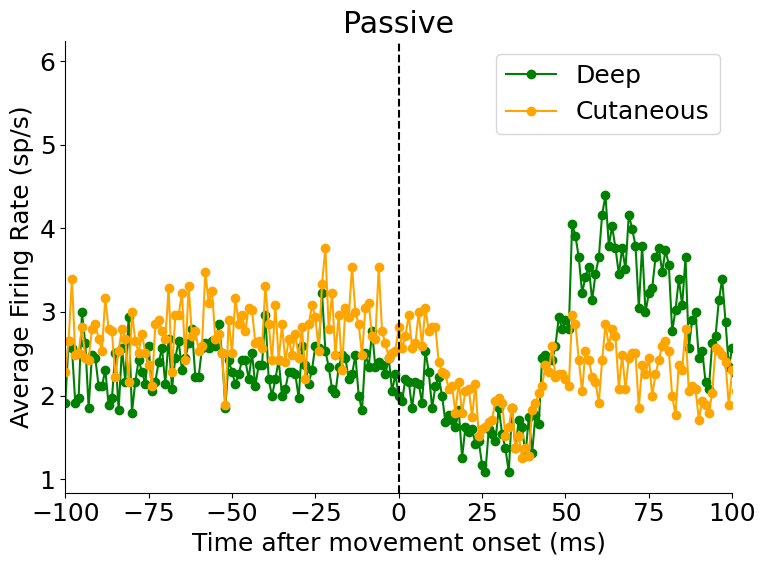

In [ ]:
passive_deep_spikes = []
pasisive_cutaneous_spikes = []

for _, trial in passive_df.groupby('trial_id'):
    passive_deep_spikes.append(np.sum(trial.spikes.to_numpy()[:,deep_neurons],axis=1))
    pasisive_cutaneous_spikes.append(np.sum(trial.spikes.to_numpy()[:,cutaneous_neurons],axis=1))
fig, ax = plt.subplots(figsize=(8,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(x_axis,np.sum(passive_deep_spikes,axis = 0)/dataset.bin_width*1000/len(passive_deep_spikes)/n_neurons,"-o",color='green',label = 'Deep')
plt.plot(x_axis,np.sum(pasisive_cutaneous_spikes,axis = 0)/dataset.bin_width*1000/len(pasisive_cutaneous_spikes)/n_neurons,"-o",color='orange',label = 'Cutaneous')
plt.legend()
plt.title('Passive')
plt.ylabel('Average Firing Rate (sp/s)')
plt.xlabel('Time after movement onset (ms)')
plt.axvline(0, color = 'k',linestyle = '--')    

plt.xlim([-100,100])
plt.tight_layout()
plt.show()


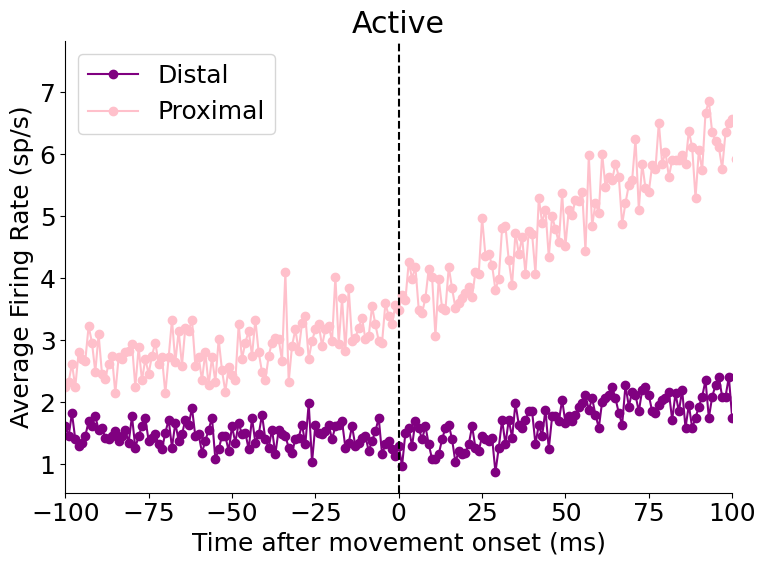

In [ ]:
active_distal_spikes = []
active_proximal_spikes = []

for _, trial in active_df.groupby('trial_id'):
    active_distal_spikes.append(np.sum(trial.spikes.to_numpy()[:,distal_neurons],axis=1))
    active_proximal_spikes.append(np.sum(trial.spikes.to_numpy()[:,proximal_neurons],axis=1))
fig, ax = plt.subplots(figsize=(8,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(x_axis,np.sum(active_distal_spikes,axis = 0)/dataset.bin_width*1000/len(active_distal_spikes)/n_neurons,"-o",color = 'purple',label = 'Distal')
plt.plot(x_axis,np.sum(active_proximal_spikes,axis = 0)/dataset.bin_width*1000/len(active_proximal_spikes)/n_neurons,"-o",color = 'pink',label = 'Proximal')
plt.legend()
plt.title('Active')
plt.ylabel('Average Firing Rate (sp/s)')
plt.xlabel('Time after movement onset (ms)')
plt.axvline(0, color = 'k',linestyle = '--')    

plt.xlim([-100,100])
plt.tight_layout()
plt.show()


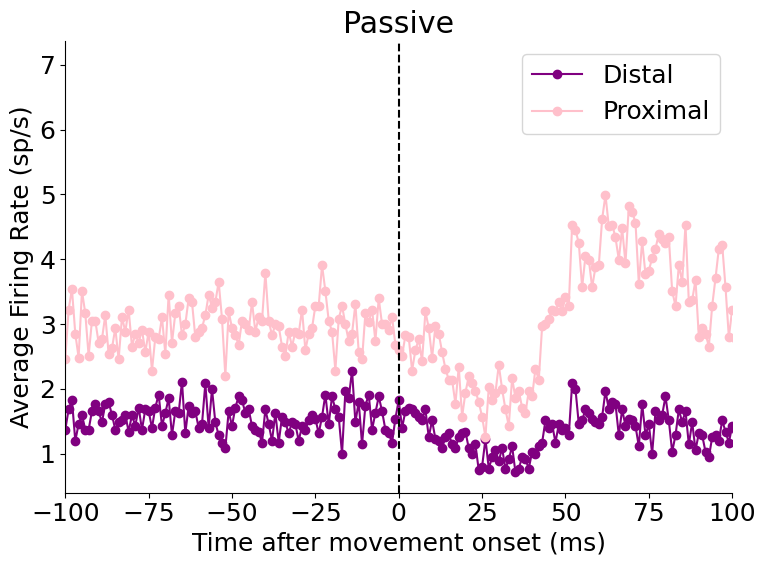

In [ ]:
passive_distal_spikes = []
passive_proximal_spikes = []

for _, trial in passive_df.groupby('trial_id'):
    passive_distal_spikes.append(np.sum(trial.spikes.to_numpy()[:,distal_neurons],axis=1))
    passive_proximal_spikes.append(np.sum(trial.spikes.to_numpy()[:,proximal_neurons],axis=1))
fig, ax = plt.subplots(figsize=(8,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(x_axis,np.sum(passive_distal_spikes,axis = 0)/dataset.bin_width*1000/len(passive_distal_spikes)/n_neurons,"-o",color = 'purple',label = 'Distal')
plt.plot(x_axis,np.sum(passive_proximal_spikes,axis = 0)/dataset.bin_width*1000/len(passive_proximal_spikes)/n_neurons,"-o",color = 'pink',label = 'Proximal')
plt.legend()
plt.title('Passive')
plt.ylabel('Average Firing Rate (sp/s)')
plt.xlabel('Time after movement onset (ms)')
plt.axvline(0, color = 'k',linestyle = '--')    

plt.xlim([-100,100])
plt.tight_layout()
plt.show()


In [ ]:
# force - forces and torques applied to the manipulandum. x, y, and z are the forces applied in their respective directions, while xmo, ymo, and zmo are the torques in those directions
# hand_pos - x and y position of the hand, in cm
# hand_vel - x and y velocity of the hand, in cm/s
# joint_ang - angle of various monkey arm joints, in degrees
# joint_vel - velocity of various monkey arm joints, in degrees/s
# muscle_len - length of various monkey arm muscles, in m
# muscle_vel - velocity of various monkey arm muscles, in m/s
# spikes - spike trains binned at 1 ms

In [ ]:
dataset.data.keys().unique(0)

Index(['force', 'hand_pos', 'hand_vel', 'joint_ang', 'joint_vel', 'muscle_len',
       'muscle_vel', 'spikes'],
      dtype='object', name='signal_type')

In [ ]:
dataset.data['muscle_len']

channel,'anconeus','bicep_lh','bicep_sh','brachialis','brachioradialis','coracobrachialis','deltoid_ant','deltoid_med','deltoid_pos','dorsoepitrochlearis',...,'pronator_teres','subscapularis','supinator','supraspinatus','teres_major','teres_minor','tricep_lat','tricep_lon','tricep_sho','abd_poll_longus'
clock_time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.002000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.003000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:04:18.465000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:04:18.466000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:04:18.467000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.data['muscle_vel']

channel,'anconeus','bicep_lh','bicep_sh','brachialis','brachioradialis','coracobrachialis','deltoid_ant','deltoid_med','deltoid_pos','dorsoepitrochlearis',...,'pronator_teres','subscapularis','supinator','supraspinatus','teres_major','teres_minor','tricep_lat','tricep_lon','tricep_sho','abd_poll_longus'
clock_time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.002000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.003000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:04:18.465000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:04:18.466000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:04:18.467000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.data['joint_ang']

channel,'elbow_flexion','radial_pronation','shoulder_flexion','shoulder_rotation','wrist_abduction','wrist_flexion','shoulder_adduction'
clock_time,,,,,,,
0 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.002000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.003000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
0 days 00:46:31.301000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:46:31.302000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:46:31.303000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.data['joint_vel']
# upper_joints = ['elbow_flexion','shoulder_flexion','shoulder_rotation','shoulder_adduction']
# lower_joints = ['radial_pronation','wrist_abduction','wrist_flexion']

channel,'elbow_flexion','radial_pronation','shoulder_flexion','shoulder_rotation','wrist_abduction','wrist_flexion','shoulder_adduction'
clock_time,,,,,,,
0 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.002000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.003000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:00.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
0 days 01:04:18.465000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:04:18.466000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:04:18.467000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.data.spikes

channel,200,201,300,301,302,400,401,600,601,700,...,9200,9201,9300,9301,9400,9401,9402,9500,9600,9601
clock_time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.001000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.002000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.003000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:00:00.004000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:48:34.935000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:48:34.936000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 days 00:48:34.937000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# trial_id - a number assigned to each trial during loading
# start_time - time when the trial begins
# end_time - time when the trial ends
# result - whether a trial was rewarded (R), aborted (A), incomplete (I), or failed (F)
# ctr_hold - the amount of time the monkey had to hold in the center before the reach
# ctr_hold_bump - whether there was a bump during the center hold period
# bump_dir - direction of the bump, in degrees. If there was no bump, bump_dir is NaN
# target_on_time - time of target presentation
# target_dir - direction to the target, in degrees
# go_cue_time - time of go cue
# bump_time - time of center hold bump, if there was one
# move_time - time of movement onset, either in response to the go cue for active trials or the center hold bump for passive trials
# cond_dir - bump_dir for passive trials and target_dir for active trials. Though it is redundant with information already in other fields, it is provided for convenience when filtering trials

In [ ]:
dataset.trial_info.keys().unique(0)

Index(['trial_id', 'start_time', 'end_time', 'result', 'ctr_hold_bump',
       'bump_dir', 'target_dir', 'go_cue_time', 'bump_time', 'cond_dir',
       'split', 'move_onset_time'],
      dtype='object')

In [ ]:
active_mask = (~dataset.trial_info.ctr_hold_bump) & (dataset.trial_info.split != 'none')
passive_mask = (dataset.trial_info.ctr_hold_bump) & (dataset.trial_info.split != 'none')


trial_mask = active_mask
n_trials = dataset.trial_info.loc[trial_mask].shape[0]
print(n_trials,'active trials')

trial_mask = passive_mask
n_trials = dataset.trial_info.loc[trial_mask].shape[0]
print(n_trials,'passive trials')

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
passive_mask

0       False
1        True
2       False
3        True
4       False
        ...  
1029    False
1030     True
1031     True
1032    False
1033    False
Length: 1034, dtype: bool

In [ ]:
dataset.trial_info.move_onset_time[1:]

1      0 days 00:00:07.792000
2                         NaT
3      0 days 00:00:12.211000
4      0 days 00:00:16.138000
5      0 days 00:00:19.261000
                ...          
1029   0 days 00:46:02.754000
1030   0 days 00:46:07.090000
1031   0 days 00:46:10.802000
1032                      NaT
1033   0 days 00:46:15.179000
Name: move_onset_time, Length: 1033, dtype: timedelta64[ns]

In [ ]:
dataset.trial_info.move_onset_time[:-1]

0      0 days 00:00:05.334000
1      0 days 00:00:07.792000
2                         NaT
3      0 days 00:00:12.211000
4      0 days 00:00:16.138000
                ...          
1028   0 days 00:45:58.037000
1029   0 days 00:46:02.754000
1030   0 days 00:46:07.090000
1031   0 days 00:46:10.802000
1032                      NaT
Name: move_onset_time, Length: 1033, dtype: timedelta64[ns]

In [ ]:
dataset.trial_info.move_onset_time

0      0 days 00:00:05.334000
1      0 days 00:00:07.792000
2                         NaT
3      0 days 00:00:12.211000
4      0 days 00:00:16.138000
                ...          
1029   0 days 00:46:02.754000
1030   0 days 00:46:07.090000
1031   0 days 00:46:10.802000
1032                      NaT
1033   0 days 00:46:15.179000
Name: move_onset_time, Length: 1034, dtype: timedelta64[ns]

In [ ]:
dataset.trial_info.bump_time

0                         NaT
1      0 days 00:00:07.817000
2                         NaT
3      0 days 00:00:12.223000
4                         NaT
                ...          
1029                      NaT
1030   0 days 00:46:07.107000
1031   0 days 00:46:10.809000
1032                      NaT
1033   0 days 00:46:15.191000
Name: bump_time, Length: 1034, dtype: timedelta64[ns]

(-100.0, 100.0)

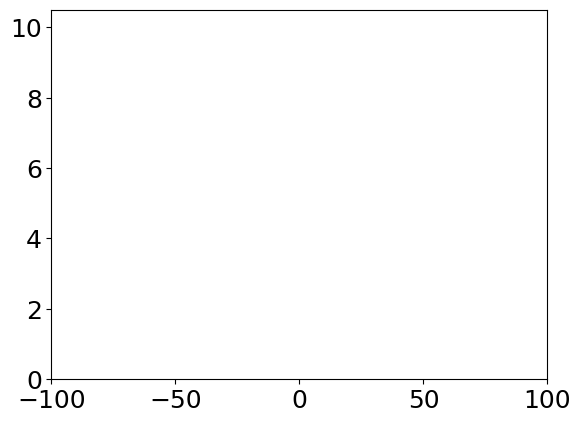

In [ ]:
plt.hist(dataset.trial_info.move_onset_time.dt.total_seconds()*1000,90)
plt.xlim(-100,100)

(-100.0, 100.0)

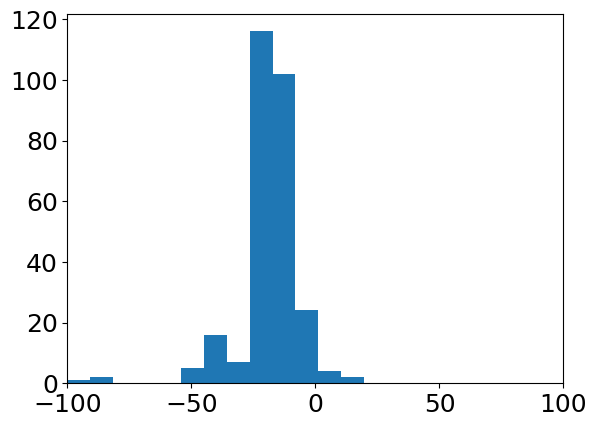

In [ ]:
import pandas as pd
plt.hist((dataset.trial_info.move_onset_time - dataset.trial_info.bump_time).dt.total_seconds()*1000,90)
plt.xlim(-100,100)

In [ ]:
dataset.trial_info.cond_dir.unique()

array([180., 360., 270.,  45., 225., 315., 450.,  90.,   0., 540., 135.,
       405., 495., 585., 630.,  nan])

In [ ]:
dataset.trial_info.split.unique()

array(['train', 'none'], dtype=object)

In [ ]:
dataset.descriptions

{'start_time': 'Start time of epoch, in seconds',
 'stop_time': 'Stop time of epoch, in seconds',
 'result': "Result of the trial, either 'R' (reward), 'A' (abort), 'I' (incomplete) or 'F' (fail)",
 'ctr_hold_bump': 'Whether there was bump during center hold',
 'bump_dir': 'Angle (in degrees) of bump direction, if there was one. 0 degrees is directly to the right, and 90 degrees is directly upward',
 'target_dir': 'Direction of target, in degrees. 0 degrees is directly to the right, and 90 degrees is directly upward',
 'go_cue_time': 'Time of go cue delivery',
 'bump_time': 'Time of bump delivery, if there was one',
 'cond_dir': 'Direction of bump for passive trials and target direction for active trials, for convenience when filtering trials',
 'split': 'Trial split that the trial belongs to. Can be "train", "val", "test", or "none"',
 'move_onset_time': 'Time of move onset around bump for passive trials and after go cue for active trials',
 'force': 'Interface forces and torques betw

In [ ]:
dataset.bin_width

1

In [ ]:
dataset.resample(10)
print(dataset.bin_width)

10


In [ ]:
len(dataset.data.force.y)

291494

In [ ]:
sum(np.isnan(dataset.data.force.y))

54

In [ ]:
cond_data.hand_pos

,x,y
0,1.295927,3.211101
10,1.293559,3.212641
20,1.295806,3.220702
30,1.300923,3.231362
40,1.307169,3.245829
...,...,...
42950,0.808800,3.344805
42960,0.800371,3.329575
42970,0.794043,3.312977
42980,0.789211,3.295191


In [ ]:
sum(np.isnan(cond_data.hand_pos.x))

0

In [139]:
dataset.trial_info['ctr_hold_bump']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1445    NaN
1446    0.0
1447    0.0
1448    0.0
1449    0.0
Name: ctr_hold_bump, Length: 1450, dtype: float64

In [143]:
cond_mask = (np.isnan(dataset.trial_info['ctr_hold_bump'])) & \
            (dataset.trial_info['bump_dir']%360==cond[1]) & \
            (dataset.trial_info.split != 'none')
sum(cond_mask)

41

In [144]:
cond_mask

0       False
1       False
2       False
3       False
4       False
        ...  
1445    False
1446    False
1447    False
1448    False
1449    False
Length: 1450, dtype: bool

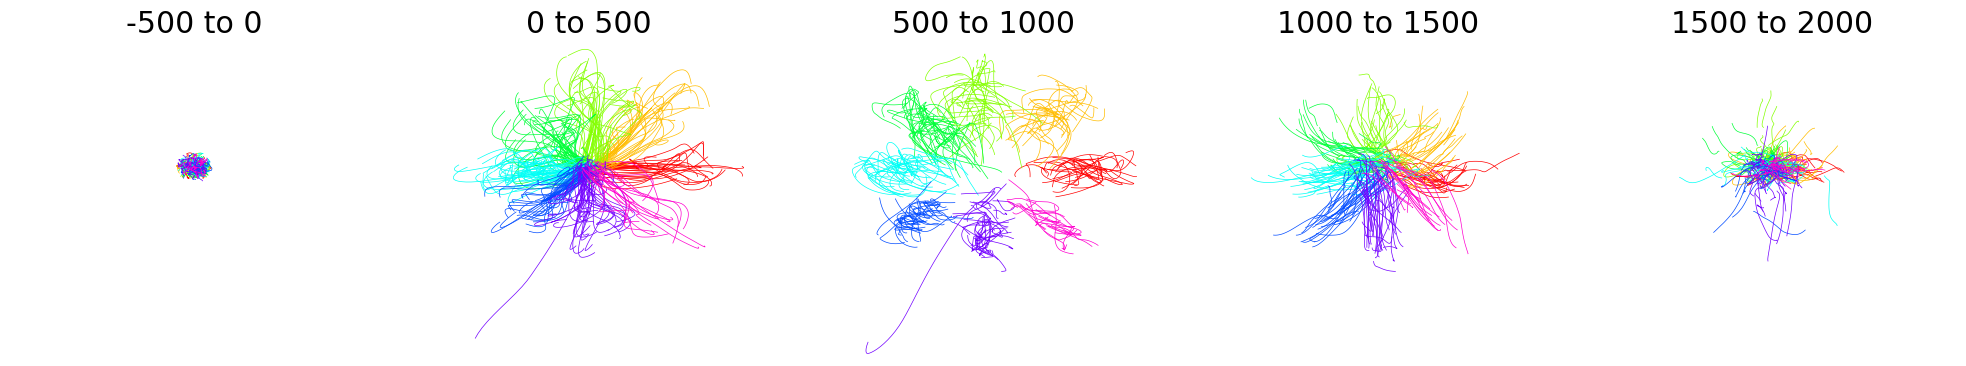

In [198]:
# All 16 conditions, in the format (ctr_hold_bump, cond_dir)
unique_conditions = [(False, 0.0), (False, 45.0), (False, 90.0), (False, 135.0),
                     (False, 180.0), (False, 225.0), (False, 270.0), (False, 315.0)]
# unique_conditions = [(True, 0.0), (True, 45.0), (True, 90.0), (True, 135.0),
#                      (True, 180.0), (True, 225.0), (True, 270.0), (True, 315.0)]

# unique_conditions = [(np.nan, 0.0), (np.nan, 45.0), (np.nan, 90.0), (np.nan, 135.0),
#                      (np.nan, 180.0), (np.nan, 225.0), (np.nan, 270.0), (np.nan, 315.0)]

# unique_conditions = [(False, 0.0), (False, 90.0), 
#                      (False, 180.0), (False, 270.0)]
# # unique_conditions = [(True, 0.0),(True, 90.0), 
#                      (True, 180.0), (True, 270.0)]

# Initialize figure
fig = plt.figure(figsize=(20, 4))
ax_0 = fig.add_subplot(1,5,1)
ax_1 = fig.add_subplot(1, 5,2)
ax_2 = fig.add_subplot(1, 5,3)
ax_3 = fig.add_subplot(1, 5,4)
ax_4 = fig.add_subplot(1, 5,5)


for cond in unique_conditions:
    # Filter out invalid trials (labeled 'none') and trials in other conditions
    # cond_mask = (dataset.trial_info['ctr_hold_bump']==cond[0]) & \
    cond_mask = (np.isnan(dataset.trial_info['ctr_hold_bump'])) & \
                (dataset.trial_info['cond_dir']%360==cond[1]) & \
                (dataset.trial_info.split != 'none')
# cond_mask = (np.isnan(dataset.trial_info['ctr_hold_bump'])) & \

    # Extract relevant portion of selected trials

    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-500, 0), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        ax_0.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
        ax_0.set_xlim([-15, 15])
        ax_0.set_ylim([-15, 15])

    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(0, 500), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        ax_1.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
        ax_1.set_xlim([-15, 15])
        ax_1.set_ylim([-15, 15])
    
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(500, 1000), ignored_trials=~cond_mask)
    for idx, trial in cond_data.groupby('trial_id'):
        ax_2.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
        ax_2.set_xlim([-15, 15])
        ax_2.set_ylim([-15, 15])
            
    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(1000, 1500), ignored_trials=~cond_mask)
    for idx, trial in cond_data.groupby('trial_id'):
        ax_3.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
        ax_3.set_xlim([-15, 15])
        ax_3.set_ylim([-15, 15])

    cond_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(1500, 2000), ignored_trials=~cond_mask)
    # Plot reaches on appropriate subplot
    for idx, trial in cond_data.groupby('trial_id'):
        ax_4.plot(trial.hand_pos.x, trial.hand_pos.y, color=plt.cm.hsv(cond[1] / 360), linewidth=0.5)
        ax_4.set_xlim([-15, 15])
        ax_4.set_ylim([-15, 15])

            
# Add labels
ax_0.set_title('-500 to 0')
ax_1.set_title('0 to 500')
ax_2.set_title('500 to 1000')
ax_3.set_title('1000 to 1500')
ax_4.set_title('1500 to 2000')



ax_0.axis("off")
ax_1.axis("off")
ax_2.axis("off")
ax_3.axis("off")
ax_4.axis("off")

figDir = '/Users/sherryan/area2_population_analysis/figures_plus/'
plt.tight_layout()
# plt.savefig(figDir + monkey + '_active_traj.pdf',dpi = 'figure')
# plt.suptitle('Active Reach Trajectories')
plt.show()

## Smoothing effect

In [ ]:
#number of neurons
n_neurons = dataset.data.spikes.shape[1]
print(n_neurons)

In [ ]:
# number of useable active trials
# Filter out invalid trials (labeled 'none') and trials in other conditions
active_mask = (np.all(dataset.trial_info[['ctr_hold_bump']] == False, axis=1)) & \
    (dataset.trial_info.split != 'none')
active_data = dataset.make_trial_data(align_field='move_onset_time', align_range=(-100, 500), ignored_trials=~active_mask)
n_trials = active_data['trial_id'].nunique();
print(n_trials)

In [ ]:
#number of time bins per trial = align_range / bin_size
for idx, trial in active_data.groupby('trial_id'):
    n_timepoints = trial.shape[0]
    break
print(n_timepoints)

In [ ]:
dataset.smooth_spk(40, name='smth_40')
dataset.smooth_spk(25, name='smth_25')
dataset.smooth_spk(10, name='smth_10')

active_trials_idx_array = np.empty((n_trials,1))
raw_active_trials_array = np.empty((n_trials,n_timepoints,n_neurons))
active_trials_smth_10_array = np.empty((n_trials,n_timepoints,n_neurons))
active_trials_smth_25_array = np.empty((n_trials,n_timepoints,n_neurons))
active_trials_smth_40_array = np.empty((n_trials,n_timepoints,n_neurons))
i = 0
for idx, trial in active_data.groupby('trial_id'):
    active_trials_idx_array[i,:]=idx
    raw_active_trials_array[i,:,:]=trial.spikes.to_numpy()
    active_trials_smth_10_array[i,:,:]=trial.spikes_smth_10.to_numpy()
    active_trials_smth_25_array[i,:,:]=trial.spikes_smth_25.to_numpy()
    active_trials_smth_40_array[i,:,:]=trial.spikes_smth_40.to_numpy()
    i+=1

In [ ]:
print(active_trials_smth_40_array.shape)
print(active_trials_idx_array.shape)

In [ ]:
x_axis = np.arange(-500,700,5)
plt.plot(x_axis,raw_active_trials_array[0,:,10]/dataset.bin_width*1000,label = 'raw')
plt.plot(x_axis,active_trials_smth_10_array[0,:,10]/dataset.bin_width*1000 ,label='smooth_10')
plt.plot(x_axis,active_trials_smth_25_array[0,:,10]/dataset.bin_width*1000 ,label='smooth_25')
plt.plot(x_axis,active_trials_smth_40_array[0,:,10]/dataset.bin_width*1000 ,label='smooth_40')
plt.title('Spike smoothing (5ms bin)')
plt.ylabel('Firing rate (spks/s)')
plt.xlabel('time (ms)')
plt.legend()